In [2]:
import pandas as pd
import requests
import json

from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.sfgov.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("imvp-dq3v", limit=300000)

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

print(df)

       gross_paid_amt meter_event_type payment_type    post_id  \
0                2.25               NS  CREDIT CARD  464-03180   
1                 0.6               NS         CASH  568-11460   
2                 2.5               NS         CASH  700-14440   
3                 0.8               NS  CREDIT CARD  591-25420   
4                0.25               AT         CASH  440-53180   
5                0.35               AT         CASH  847-00310   
6                   6               AT  CREDIT CARD  464-03040   
7                1.25               NS         CASH  700-07140   
8                 0.5               NS  CREDIT CARD  671-01240   
9                 0.5               NS         CASH  226-33500   
10                0.4               AT         CASH  360-05090   
11               0.35               AT         CASH  591-00430   
12                  4               NS  PAY BY CELL  470-15090   
13                7.5               NS  CREDIT CARD  650-05130   
14        

In [6]:
#Exploratory Step 1 - Data Prep
df_sum = df.copy()

df_sum['session_start_dt'] = df_sum['session_start_dt'].str.replace('.',':')
df_sum['session_start_dt'] = pd.to_datetime(df_sum['session_start_dt'])

df_sum['session_end_dt'] = df_sum['session_end_dt'].str.replace('.',':')
df_sum['session_end_dt'] = pd.to_datetime(df_sum['session_end_dt'])

#Step 2 - Converting meaningful data
'''
1. Parking durations
2. ocurred hour
3. Find weekday or weekend
'''
df_sum['duration'] = df_sum['session_end_dt'] - df_sum['session_start_dt'] 
df_sum['orcurred_hour'] = df_sum['session_start_dt'].dt.hour
df_sum['weekday'] = df_sum['session_start_dt'].dt.dayofweek

print(df_sum)



       gross_paid_amt meter_event_type payment_type    post_id  \
0                2.25               NS  CREDIT CARD  464-03180   
1                 0.6               NS         CASH  568-11460   
2                 2.5               NS         CASH  700-14440   
3                 0.8               NS  CREDIT CARD  591-25420   
4                0.25               AT         CASH  440-53180   
5                0.35               AT         CASH  847-00310   
6                   6               AT  CREDIT CARD  464-03040   
7                1.25               NS         CASH  700-07140   
8                 0.5               NS  CREDIT CARD  671-01240   
9                 0.5               NS         CASH  226-33500   
10                0.4               AT         CASH  360-05090   
11               0.35               AT         CASH  591-00430   
12                  4               NS  PAY BY CELL  470-15090   
13                7.5               NS  CREDIT CARD  650-05130   
14        

                            post_id  gross_paid_amt         duration
street_block                                                        
BLUXOME ST 0                    709         3914.58 78 days 05:33:43
BRYANT ST 400                   446         3138.41 57 days 23:07:04
BRANNAN ST 100                  564         3005.15 47 days 03:22:47
EMBARCADERO SOUTH 200           806         2986.14 71 days 16:18:44
EMBARCADERO SOUTH 400           447         2927.16 40 days 06:40:39
California and Steiner Lot      497         2677.59 31 days 03:04:34
CHESTNUT ST 2100                833         2625.40 19 days 23:23:08
CHANNEL ST 200                  569         2596.38 47 days 11:47:43
BRANNAN ST 400                  573         2580.64 37 days 04:59:33
HOWARD ST 500                   442         2538.22 32 days 11:38:52


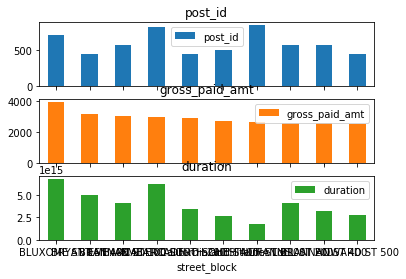

In [42]:
#Step 3 - Aggregate Data - by Location
#Plot 1 Graph by location

df_sum['gross_paid_amt'] = df_sum['gross_paid_amt'].astype(float)

#Step 3-1 Rev vs Parking Spot 
df_address_1 = df_sum.groupby(['street_block'])['post_id'].count()
df_address_2 = df_sum.groupby(['street_block'])['gross_paid_amt'].sum()
df_address_1=pd.DataFrame(df_address_1)
df_address_2=pd.DataFrame(df_address_2)
df_address_rev = df_address_1.join(df_address_2)

#Step 3-2 Occupation vs Parking Spot
df_address_3 = df_sum.groupby(['street_block'])['duration'].sum()
df_address_3=pd.DataFrame(df_address_3)
df_address_rev = df_address_rev.join(df_address_3)

df_address_rev.reset_index('street_block')

#Plot Exploration

df_address_plot = df_address_rev.nlargest(10, 'gross_paid_amt')

print(df_address_plot)

df_plot1 = df_address_plot.plot.bar(rot=0,subplots=True)

print(df_plot1)

